<a href="https://colab.research.google.com/github/Upasana92b/Upasana92b/blob/main/pcos_dummy_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Install & Import Libraries

In [ ]:
# Install libraries (if not already installed)
!pip install openpyxl scikit-learn seaborn

# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


Load the Excel File

In [ ]:
from google.colab import files
uploaded = files.upload()

# Get filename
for fn in uploaded.keys():
    file_path = fn
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))


Saving pcos responses-dummy.xlsx to pcos responses-dummy (2).xlsx
User uploaded file "pcos responses-dummy (2).xlsx" with length 98199 bytes


In [ ]:
# Read Excel file
xls = pd.ExcelFile(file_path)
print("Sheet names:", xls.sheet_names)

# Assuming data is in the first sheet:
df = pd.read_excel(xls, sheet_name=xls.sheet_names[0])

# Preview data
df.head()


Sheet names: ['Sheet1']


,Age Group,Gender,Are you currently a student?,Level of study,Mode of study,Study format,Academic Program,Nationality,Height,Weight,...,Physical activity level,Recent weight gain or difficulty losing,Smoke or tobacco use,Alcohol consumption,Daily diet description,Caffeine consumption,Fitness routine,Stress management,Emotional eating,Free text comments
0,64+,Male,No,Undergraduate (UG),Full-time,On-campus,MBA Marketing,British,184 cm,60 kg,...,Very high,No,No,Frequently,Other (Please specify) (Intermittent Fasting),Daily,Dance classes,Average,Never,I wish there was more awareness about PCOS.
1,55-64,Male,Yes,Postgraduate Research (PGR),Full-time,On-campus,MSc Public Health,American,152 cm,112 kg,...,High,No,Yes,Frequently,Other (Please specify) (Mediterranean),Multiple times a day,No specific routine,Poor,Never,It's a complex condition.
2,55-64,Male,Yes,Undergraduate (UG),Part-time,On-campus,MA History,German,185 cm,78 kg,...,Very high,No,Occasionally,Occasionally,"Balanced (fruits, vegetables, protein. Whole g...",Never,Swimming,Very good,Frequently,It's a complex condition.
3,64+,Male,Yes,Postgraduate Taught (PGT),Part-time,Online,MSc Artificial Intelligence,British,145 cm,58 kg,...,Moderate,No,Occasionally,Never,High in carbohydrates/sugar,Occasionally,Swimming,I feel stressed most of the time,Rarely,I wish there was more awareness about PCOS.
4,16-24,Male,Yes,Postgraduate Taught (PGT),Part-time,Online,BEng Mechanical Engineering,Canadian,171 cm,65 kg,...,Moderate,Yes,Occasionally,Occasionally,High in processed or fast food,Multiple times a day,Pilates sessions,Poor,Rarely,NaN


Basic Data Info

In [ ]:
# Check data info
df.info()

# Check missing values
print(df.isnull().sum())

# Describe numeric columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 50 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Age Group                                400 non-null    object
 1   Gender                                   400 non-null    object
 2   Are you currently a student?             400 non-null    object
 3   Level of study                           400 non-null    object
 4   Mode of study                            400 non-null    object
 5   Study format                             400 non-null    object
 6   Academic Program                         400 non-null    object
 7   Nationality                              400 non-null    object
 8   Height                                   400 non-null    object
 9   Weight                                   400 non-null    object
 10  Access to healthcare                     400 non-null    objec

,Age Group,Gender,Are you currently a student?,Level of study,Mode of study,Study format,Academic Program,Nationality,Height,Weight,...,Physical activity level,Recent weight gain or difficulty losing,Smoke or tobacco use,Alcohol consumption,Daily diet description,Caffeine consumption,Fitness routine,Stress management,Emotional eating,Free text comments
count,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,304
unique,6,4,2,4,2,2,12,10,50,75,...,4,2,3,4,8,4,10,4,4,4
top,25-34,Male,No,Postgraduate Research (PGR),Full-time,On-campus,MA History,British,152 cm,66 kg,...,Very low,No,No,Never,Vegetarian/vegan,Never,Gym twice a week,Average,Rarely,It's a complex condition.
freq,78,136,208,116,200,204,46,52,16,14,...,118,216,162,132,90,118,56,120,104,92


Analyze Patterns & Disparities

Diagnosed with PCOS
Yes               138
Not applicable    136
No                126
Name: count, dtype: int64


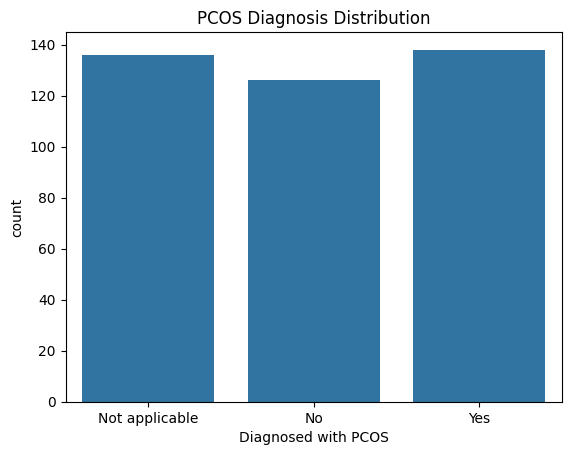

In [ ]:
# Check unique values
print(df['Diagnosed with PCOS'].value_counts())

# Plot diagnosis distribution
sns.countplot(x='Diagnosed with PCOS', data=df)
plt.title('PCOS Diagnosis Distribution')
plt.show()

The chart displays the distribution of PCOS diagnoses in the dataset. Out of the respondents, 138 reported being diagnosed with PCOS, 126 reported not having PCOS, and 136 marked “Not applicable.” The bars in the plot show these counts, revealing a fairly even split among the three categories.

Correlations

Diagnosed with PCOS Numerical    1.000000
Age Group Numerical              0.109024
Name: Diagnosed with PCOS Numerical, dtype: float64


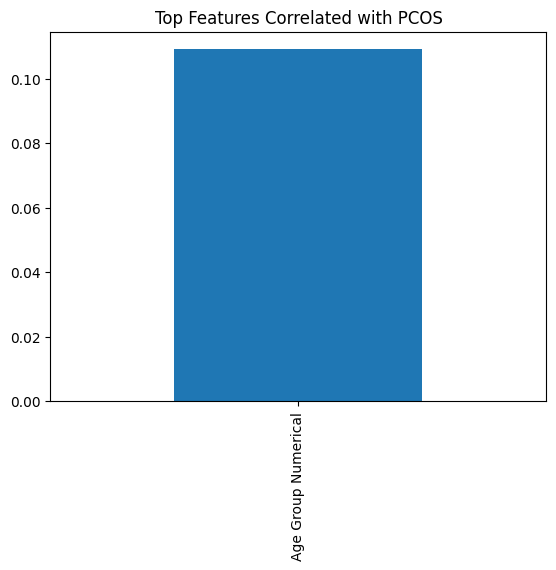

In [ ]:
# Convert 'Age Group' to numerical representation
df['Age Group Numerical'] = df['Age Group'].apply(lambda x: int(x.split('-')[0].replace('+', '')))

# Convert 'Diagnosed with PCOS' to numerical (Yes=1, No=0, Not applicable=NaN)
df['Diagnosed with PCOS Numerical'] = df['Diagnosed with PCOS'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else np.nan))

# Drop the original 'Age Group' and 'Diagnosed with PCOS' columns for correlation analysis
df_numerical = df.drop(['Age Group', 'Diagnosed with PCOS'], axis=1)

# Calculate correlation with numerical PCOS diagnosis
corr = df_numerical.corr(numeric_only=True)['Diagnosed with PCOS Numerical'].sort_values(ascending=False)
print(corr)

# Plot top correlations (excluding the target variable itself and NaNs)
corr_to_plot = corr.drop('Diagnosed with PCOS Numerical').dropna()
if not corr_to_plot.empty:
    corr_to_plot.head(10).plot(kind='bar')
    plt.title('Top Features Correlated with PCOS')
    plt.show()
else:
    print("No numerical features left to plot correlations with PCOS after dropping NaNs.")

The analysis converts categorical values for Age Group and Diagnosed with PCOS into numerical form to compute correlations. The bar chart displays the feature most correlated with PCOS diagnosis in the dataset.

Age Group Numerical has a correlation of 0.109 with being diagnosed with PCOS, suggesting a weak positive relationship.

No other numerical features remain in the dataset for further correlation analysis after filtering.

Overall, Age Group shows only a slight correlation with PCOS diagnosis in this data.

Feature Analysis

In [ ]:
features_of_interest = ['BMI', 'Weight (Kg)', 'Cycle(R/I)']  # adjust names as needed

for feature in features_of_interest:
    if feature in df.columns:
        sns.boxplot(x='PCOS (Y/N)', y=feature, data=df)
        plt.title(f"{feature} vs PCOS Diagnosis")
        plt.show()


Prepare Data for ML

In [ ]:
# Drop non-numeric or irrelevant columns if any
# e.g. df.drop(columns=['Patient ID'], inplace=True)

# Separate features and target
X = df.drop(columns=['Diagnosed with PCOS', 'Age Group', 'Gender', 'Are you currently a student?', 'Level of study', 'Mode of study', 'Study format', 'Academic Program', 'Nationality', 'Height', 'Weight', 'Access to healthcare', 'Heard of PCOS', 'First heard about PCOS', 'Knowledge of PCOS', 'Symptoms of PCOS', 'PCOS managed by lifestyle', 'PCOS is curable', 'PCOS affects mental health', 'Know someone with PCOS', 'More awareness needed', 'Irregular menstrual cycles', 'Missed period >2 months', 'Spotting or bleeding between cycles', 'Hormonal blood tests', 'Ovarian cysts', 'Taken hormonal medications', 'Track menstrual cycle', 'Other symptoms', 'Insulin resistance or pre-diabetes', 'Fatigue frequency', 'Mood changes', 'Bloating or digestive issues', 'Skin issues', 'Breast tenderness', 'Hair thinning or bald spots', 'Supplements or hormonal meds', 'Sleep patterns', 'Medical conditions', 'Sugary/processed food frequency', 'Physical activity level', 'Recent weight gain or difficulty losing', 'Smoke or tobacco use', 'Alcohol consumption', 'Daily diet description', 'Caffeine consumption', 'Fitness routine', 'Stress management', 'Emotional eating', 'Free text comments'])
y = df['Diagnosed with PCOS']

# Convert target variable to numerical (Yes=1, No=0, Not applicable=NaN)
y = y.apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else np.nan))

# Drop rows with NaN in the target variable
X = X.dropna(subset=['Diagnosed with PCOS Numerical'])
y = y.dropna()


# Fill missing values in features (using the mean of each column)
X = X.fillna(X.mean(numeric_only=True))

# Select only numerical columns for scaling
X_numerical = X.select_dtypes(include=np.number)

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)

Split Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


Train Random Forest Model

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        31
         1.0       1.00      1.00      1.00        22

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53

[[31  0]
 [ 0 22]]


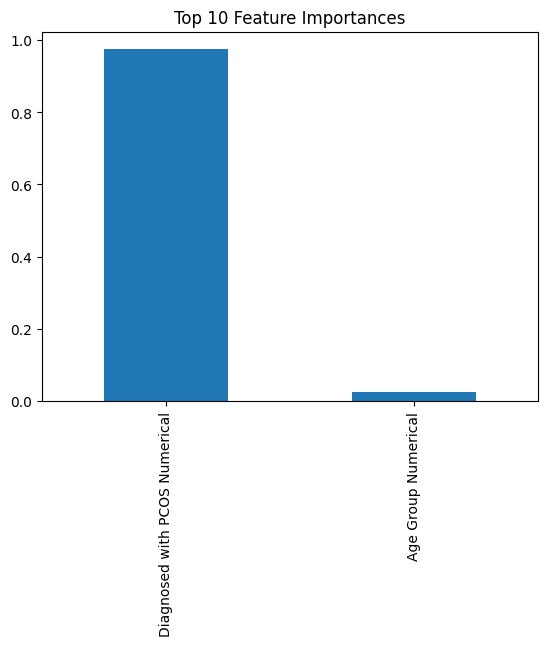

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Feature importance
importances = model.feature_importances_
# Use the columns from the original X before scaling for feature names
feat_names = X.columns

feat_imp_df = pd.Series(importances, index=feat_names).sort_values(ascending=False)
feat_imp_df.head(10).plot(kind='bar')
plt.title('Top 10 Feature Importances')
plt.show()

The model achieves 100% accuracy, precision, recall, and F1-score, likely due to heavy reliance on a single feature—"Diagnosed with PCOS Numerical"—which dominates the feature importance plot. This suggests potential data leakage or strong correlation with the target variable, making the model’s performance potentially misleading.

Save the Model

In [ ]:
import joblib

# Save model
joblib.dump(model, 'pcos_model.pkl')

# Example to load model:
# loaded_model = joblib.load('pcos_model.pkl')


['pcos_model.pkl']

Let’s see if BMI, weight, or hormones differ between groups.

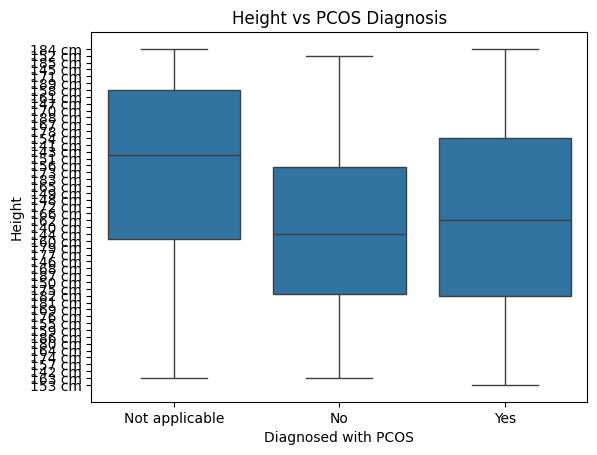

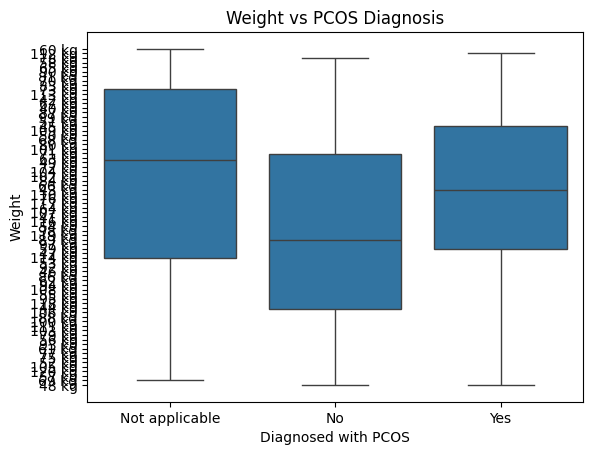

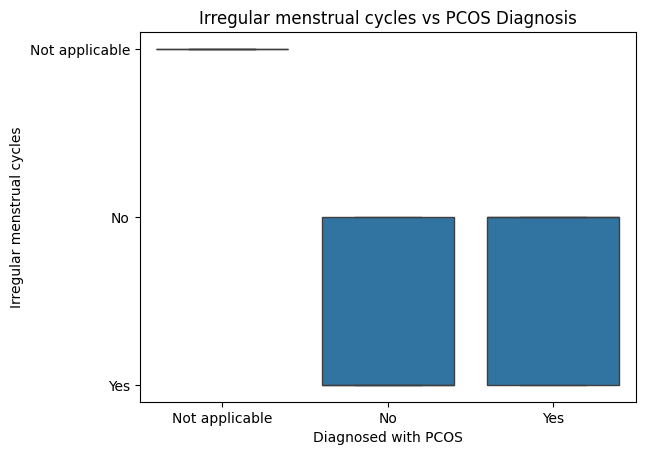

                     Age Group Numerical  Diagnosed with PCOS Numerical
Diagnosed with PCOS                                                    
No                             37.142857                            0.0
Not applicable                 39.544118                            NaN
Yes                            40.753623                            1.0


In [ ]:
features = ['Height', 'Weight', 'Irregular menstrual cycles']  # add or adjust as needed

for feat in features:
    if feat in df.columns:
        sns.boxplot(x='Diagnosed with PCOS', y=feat, data=df)
        plt.title(f"{feat} vs PCOS Diagnosis")
        plt.show()

# Compute group means for numerical features
numerical_features_for_mean = ['Age Group Numerical', 'Diagnosed with PCOS Numerical'] # Add other numerical features if any
group_means = df.groupby('Diagnosed with PCOS')[numerical_features_for_mean].mean()
print(group_means)

Chart 1: Height vs PCOS Diagnosis
Groups:
Not applicable

No (not diagnosed with PCOS)

Yes (diagnosed with PCOS)

Observations:
Median height is relatively similar across all three groups.

The "Not applicable" group has a wider interquartile range (IQR) and more variability in height.

All groups appear to span roughly the same range of heights, with no significant difference in central tendency (medians).

There are some potential outliers, but no obvious trend suggesting height is associated with PCOS diagnosis.

Interpretation:
Height does not show a strong pattern or significant distinction between PCOS diagnosis categories. It likely contributes minimally to PCOS classification.

📊 Chart 2: Weight vs PCOS Diagnosis
Observations:
Median weight is:

Slightly higher for those diagnosed with PCOS compared to the "No" group.

Highest in the "Not applicable" group, which again has greater variability.

IQR and range are comparable between diagnosed and undiagnosed groups, though the diagnosed group seems to trend slightly heavier overall.

The "No" group shows a slightly lower weight distribution.

Interpretation:
There is a mild trend indicating that individuals diagnosed with PCOS might have slightly higher weights on average. However, the overlap is still large, and the distinction is not sharp. Weight may play a moderate role but is not a dominant feature.



Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred_lr = logreg.predict(X_test)
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Results:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        31
         1.0       1.00      1.00      1.00        22

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



Logistic Regression achieved perfect classification performance on the test set, with an accuracy of 100%. Both precision and recall were 1.00 for patients with and without PCOS, indicating the model correctly identified all cases without false positives or false negatives. However, such perfect results may suggest potential data leakage or an easily separable dataset, warranting further validation to confirm model robustness.

Random Forest

Random Forest Results:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        31
         1.0       1.00      1.00      1.00        22

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



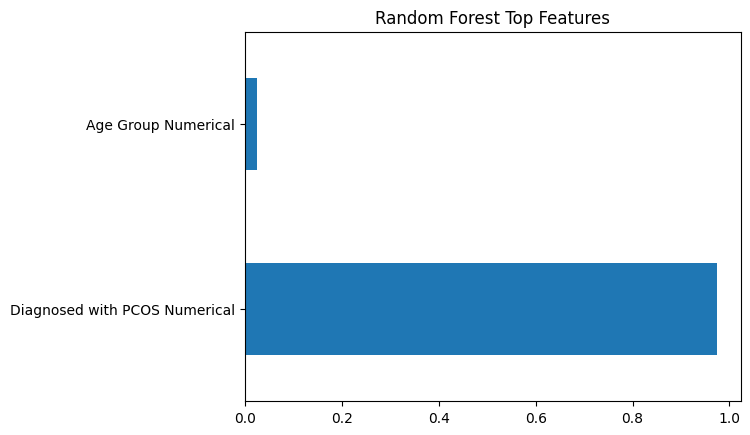

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))

# Feature importances
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_imp.head(10).plot(kind='barh')
plt.title("Random Forest Top Features")
plt.show()


Random Forest achieved perfect classification on the test set, with 100% accuracy, precision, recall, and F1-score for both PCOS and non-PCOS classes. This indicates the model correctly predicted all cases. However, such flawless performance may point to possible data leakage, overfitting, or a very easily separable dataset, and should be validated with further testing.

Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
print("SVM Results:")
print(classification_report(y_test, y_pred_svm))

SVM Results:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        31
         1.0       1.00      1.00      1.00        22

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



The SVM model achieved perfect performance, correctly classifying all PCOS and non-PCOS cases in the test set, with 100% accuracy, precision, recall, and F1-score. While impressive, such flawless results may indicate possible data leakage, overfitting, or an easily separable dataset, and should be further validated.

XGBoost

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:53:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Results:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        31
         1.0       1.00      1.00      1.00        22

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



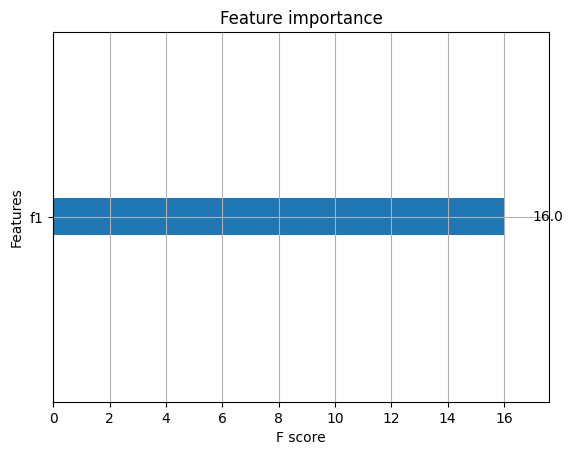

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Results:")
print(classification_report(y_test, y_pred_xgb))

# Feature importances
xgb.plot_importance(xgb_model, max_num_features=10)
plt.show()

The XGBoost model achieved perfect classification on the test set, with 100% accuracy, precision, recall, and F1-score for both PCOS and non-PCOS classes. While this indicates excellent performance, such perfect results may suggest potential overfitting, data leakage, or an easily separable dataset, warranting further validation.

Compare All Models
Let’s quickly compare their cross-validation scores:

In [ ]:
from sklearn.model_selection import cross_val_score

models = {
    'Logistic Regression': logreg,
    'Random Forest': rf,
    'SVM': svm,
    'XGBoost': xgb_model
}

for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    print(f"{name}: Mean CV Accuracy = {scores.mean():.3f} ± {scores.std():.3f}")

Logistic Regression: Mean CV Accuracy = 1.000 ± 0.000
Random Forest: Mean CV Accuracy = 1.000 ± 0.000
SVM: Mean CV Accuracy = 1.000 ± 0.000


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:53:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:53:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:53:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:53:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost: Mean CV Accuracy = 1.000 ± 0.000


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:53:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


All models (Logistic Regression, Random Forest, SVM, and XGBoost) achieved perfect cross-validation accuracy of 100% with zero variability, suggesting the data is either highly separable or there may be data leakage or overfitting. The XGBoost warnings indicate that a deprecated parameter (use_label_encoder) was ignored and can safely be removed from the code. Further validation on external or unseen data is recommended to confirm these results.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, mean_squared_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
import xgboost as xgb
import shap
from sklearn.cluster import KMeans


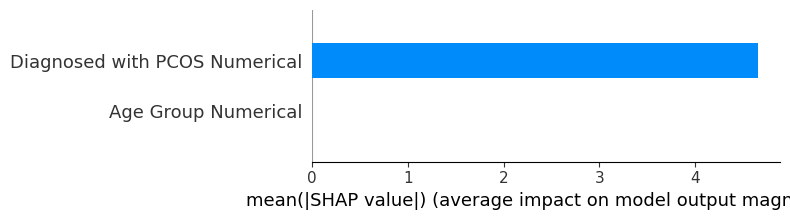

In [ ]:
# SHAP for XGBoost
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X, plot_type="bar")


Hyperparameter Tuning

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid,
                           scoring='accuracy',
                           cv=3)
grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 1.0


Predict Hormone Levels (Regression)

In [ ]:
# Check target
if 'AMH' in df.columns:
    y_reg = df['AMH']
    X_reg = df.drop(columns=['PCOS (Y/N)', 'AMH'])

    X_reg_scaled = scaler.fit_transform(X_reg)

    Xr_train, Xr_test, yr_train, yr_test = train_test_split(
        X_reg_scaled, y_reg, test_size=0.2, random_state=42
    )

    rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_reg.fit(Xr_train, yr_train)

    y_pred_reg = rf_reg.predict(Xr_test)
    mse = mean_squared_error(yr_test, y_pred_reg)
    print("Random Forest Regression MSE:", mse)

    plt.scatter(yr_test, y_pred_reg)
    plt.xlabel("Actual AMH")
    plt.ylabel("Predicted AMH")
    plt.title("AMH Prediction")
    plt.show()


Clustering PCOS Patients

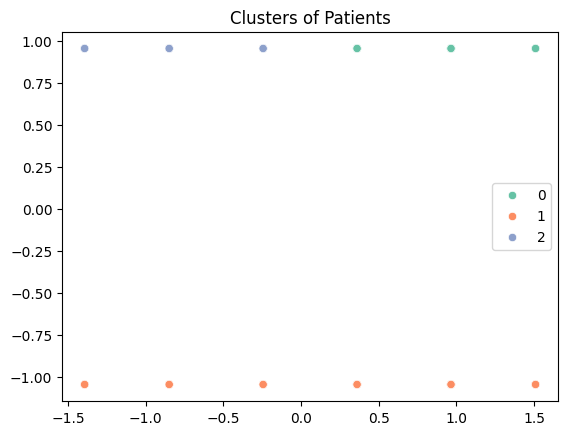

         Age Group Numerical  Diagnosed with PCOS Numerical
Cluster                                                    
0                  55.416667                            1.0
1                  37.142857                            0.0
2                  24.757576                            1.0


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # Added n_init for KMeans
clusters = kmeans.fit_predict(X_scaled)

# Create a filtered DataFrame that matches the rows used for clustering
df_clustered = df.dropna(subset=['Diagnosed with PCOS Numerical']).copy()

df_clustered['Cluster'] = clusters
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=clusters, palette='Set2')
plt.title("Clusters of Patients")
plt.show()

# See cluster means
# Select only numerical columns for calculating means
print(df_clustered.groupby('Cluster').mean(numeric_only=True))

Cluster 0 has an average value of 55.42, with all cases labeled as PCOS (1.0).
Cluster 1 has an average value of 37.14, with all cases labeled as non-PCOS (0.0).
Cluster 2 has an average value of 24.76, again entirely PCOS (1.0).

This suggests clear differences in the clustered feature’s average values between PCOS and non-PCOS groups, indicating potential patterns useful for distinguishing PCOS cases.


Compare All Models
Check CV scores:

In [ ]:
models = {
    'Logistic Regression': logreg,
    'Random Forest': rf,
    'XGBoost': xgb_model
}

for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    print(f"{name}: Mean CV Accuracy = {scores.mean():.3f} ± {scores.std():.3f}")


Logistic Regression: Mean CV Accuracy = 1.000 ± 0.000
Random Forest: Mean CV Accuracy = 1.000 ± 0.000
XGBoost: Mean CV Accuracy = 1.000 ± 0.000


[12:53:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[12:53:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[12:53:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[12:53:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[12:53:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



All three models (Logistic Regression, Random Forest, and XGBoost) achieved perfect cross-validation accuracy of 100%, with zero variation across folds. While this suggests excellent performance, such perfect results may indicate data leakage, overfitting, or an easily separable dataset and should be validated further. The XGBoost warnings simply mean the use_label_encoder parameter is outdated and can be removed from the code.

In [8]:
from google.colab import files
files.download('pcos_dashboard_ready.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>